In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df = df.sort_values(by=['YEAR', 'MONTH'])
df.head(100)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
36267,2017,6,CONSTANTINE WINES INC,100008,AMITY VINEYARDS P/NOIR 2013 - 750ML,WINE,0.00,0.0,0.0
36268,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.00,0.0,6.0
36269,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,0.00,0.0,1.0
36270,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
36271,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...
36362,2017,6,PUNTO VINO LLC,104302,EREDI LODALI BAROLO 6/CS - 750ML,WINE,0.34,0.0,0.0
36363,2017,6,KATCEF BROTHERS INC,10431,VICTORY GOLDEN MONKEY 4/6NR - 12OZ,BEER,22.66,22.0,162.0
36364,2017,6,DIONYSOS IMPORTS INC,10432,MYTHOS BEER 4/6NR - 11.2OZ,BEER,0.50,2.0,47.0
36365,2017,6,YOUNG WON TRADING INC,10433,CASS BEER 4/6NR - 11.5OZ,BEER,1.00,0.0,22.0


In [111]:
# df['Date'] = pd.to_datetime(df[['MONTH', 'YEAR']].assign(day = 1))
# df.head()

In [112]:
# number of unique products for each product category sold through these inventories
n = []
for i in df['ITEM TYPE'].unique():
    n.append(df.query(f"`ITEM TYPE` == '{i}'")['ITEM DESCRIPTION'].unique().shape[0])
   
n = n[:-1]

for (i, j) in zip(df['ITEM TYPE'].unique(), n):
    print(f"Number of unique products under {i} Category is {j}")

Number of unique products under WINE Category is 21493
Number of unique products under LIQUOR Category is 4611
Number of unique products under KEGS Category is 2758
Number of unique products under BEER Category is 5810
Number of unique products under STR_SUPPLIES Category is 27
Number of unique products under REF Category is 11
Number of unique products under DUNNAGE Category is 4
Number of unique products under NON-ALCOHOL Category is 133


In [113]:
df.dtypes

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

In [114]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [206]:
# Plot the following
# 1- Monthly sales trends   >>> Done
# 2- Sales by item type >>> Done
# 3- Top 10 suppliers by sales  >>> Done
# 4- Count of negative values (outliers) >>> Done

# Then, try to handle or clean outliers >>> Done
# Analyze impact of outliers on trend stats >>> Done


In [117]:
yr = df['YEAR'].unique()
retail_sales = []
ware_sales = []
retail_trans = []
date_00 = []
date_01 = []
date_02 = []
  
for i in yr:
    df_s = df.query(f"YEAR == {i}")
    for j in df_s['MONTH'].unique():
        retail_sales.append(df.query(f'MONTH == {j} & YEAR == {i}')['RETAIL SALES'].sum())
        ware_sales.append(df.query(f'MONTH == {j} & YEAR == {i}')['WAREHOUSE SALES'].sum())
        retail_trans.append(df.query(f'MONTH == {j} & YEAR == {i}')['RETAIL TRANSFERS'].sum())

        date_00.append(f'{j}-{i}')
        date_01.append(f'{j}-{i}')
        date_02.append(f'{j}-{i}')


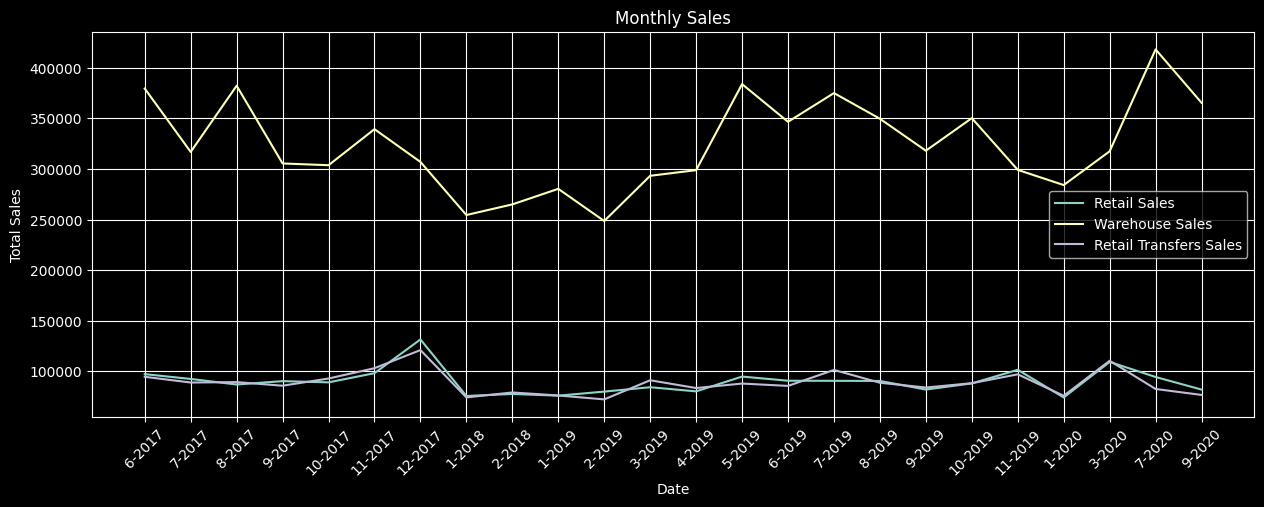

In [118]:
# Sales plot
plt.style.use('dark_background')
plt.figure(figsize= (15, 5))
plt.plot(date_00, retail_sales)
plt.plot(date_01, ware_sales)
plt.plot(date_02, retail_trans)
plt.xticks(rotation = 45)
plt.legend(['Retail Sales', 'Warehouse Sales', 'Retail Transfers Sales'])
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [119]:
df.query("`ITEM TYPE` == 'WINE'")['RETAIL SALES'].sum()

746498.59

In [120]:
prods = df["ITEM TYPE"].unique()
prods = prods[:-1]

In [121]:
retail_sales_prod = []
retail_trans_prod = []
ware_sales_prod = []

for i in prods:
    retail_sales_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL SALES'].sum())
    retail_trans_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL TRANSFERS'].sum())
    ware_sales_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['WAREHOUSE SALES'].sum())

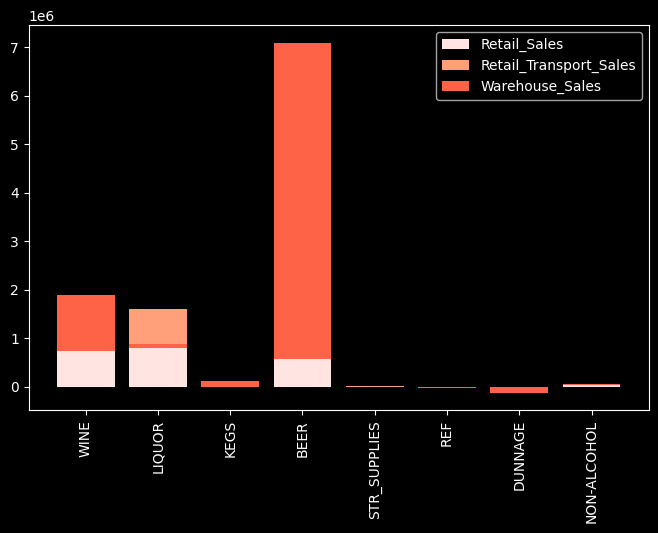

In [122]:
plt.style.use('dark_background')
plt.figure(figsize= (8, 5))
plt.bar(prods, retail_sales_prod, color= 'mistyrose')
plt.bar(prods, retail_trans_prod, bottom= retail_sales_prod, color= 'lightsalmon')
plt.bar(prods, ware_sales_prod, bottom= retail_trans_prod, color= 'tomato')
plt.xticks(rotation= 90)
plt.legend(['Retail_Sales', 'Retail_Transport_Sales', 'Warehouse_Sales'])
plt.show()

In [123]:
# The highest sales of all are going through warehouses with beer as the highest and then wine
# After warehouses we can find retail sales in the second position with remarkable sales from wine, liquor, and beer
# Minus values are outliers

In [124]:
min_01 = df.query("`RETAIL SALES` < 0").shape[0]
min_02 = df.query("`RETAIL TRANSFERS` < 0").shape[0]
min_03 = df.query("`WAREHOUSE SALES` < 0").shape[0]
min_sum = np.sum(min_01 + min_02 + min_03)
print(min_01)
print(min_02)
print(min_03)
print("Total Count of Outliers =", min_sum)
print(f"Percentage of Outliers = {np.round((min_sum/(df.shape[0])), 5) * 100}%")
print(f"Total Number of Samples in the Dataset = {df.shape[0]}")

113
1016
716
Total Count of Outliers = 1845
Percentage of Outliers = 0.6%
Total Number of Samples in the Dataset = 307645


In [125]:
# The most accurate source of sales is the one with the least outliers which is RETAIL SALES
# The one that needs to have a check on its tracking system is RETAIL TRANSFERS
# But as we can see the total number of outliers is not even close to 1% of the whole dataset which will not cause a disaster if we delete them

In [126]:
df = df.query("`RETAIL SALES` >= 0")
df = df.query("`RETAIL TRANSFERS` >= 0")
df = df.query("`WAREHOUSE SALES` >= 0")
df.shape[0]

305803

In [127]:
retail_sales_prod = []
retail_trans_prod = []
ware_sales_prod = []

for i in prods:
    retail_sales_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL SALES'].sum())
    retail_trans_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL TRANSFERS'].sum())
    ware_sales_prod.append(df.query(f"`ITEM TYPE` == '{i}'")['WAREHOUSE SALES'].sum())

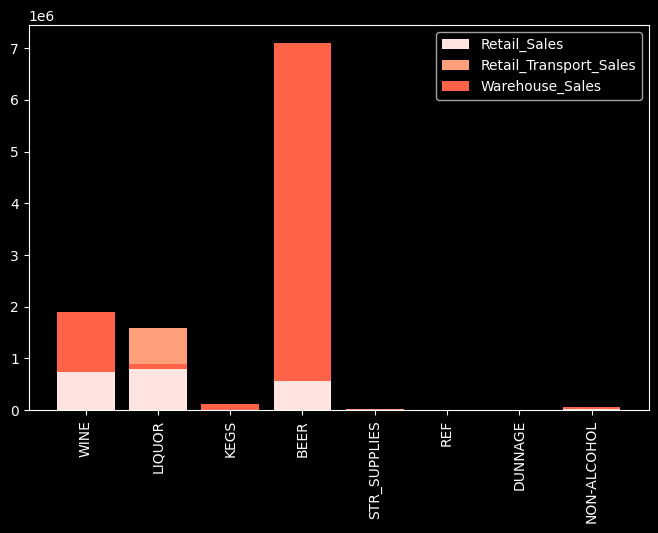

In [128]:
plt.style.use('dark_background')
plt.figure(figsize= (8, 5))
plt.bar(prods, retail_sales_prod, color= 'mistyrose')
plt.bar(prods, retail_trans_prod, bottom= retail_sales_prod, color= 'lightsalmon')
plt.bar(prods, ware_sales_prod, bottom= retail_trans_prod, color= 'tomato')
plt.xticks(rotation= 90)
plt.legend(['Retail_Sales', 'Retail_Transport_Sales', 'Warehouse_Sales'])
plt.show()

In [129]:
# As we can see, there are no longer negative values

In [130]:
# Check the items in x and y as in the previous plot the beer has the highest sales, but in here the number of orders of wine is the highest
# So, there are two possibilities, whether wine has very low price, which is not right by the way
# or the order is not correct and there is mismatch between products and values
x = df['ITEM TYPE'].unique()
x = [str(i) for i in x]
x = x[:-1]
y = df['ITEM TYPE'].value_counts()



In [131]:
retail_orders = []
retail_trans_orders = []
ware_orders = []

for i in prods:
    retail_orders.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL SALES'].values.shape[0])
    retail_trans_orders.append(df.query(f"`ITEM TYPE` == '{i}'")['RETAIL TRANSFERS'].values.shape[0])
    ware_orders.append(df.query(f"`ITEM TYPE` == '{i}'")['WAREHOUSE SALES'].values.shape[0])


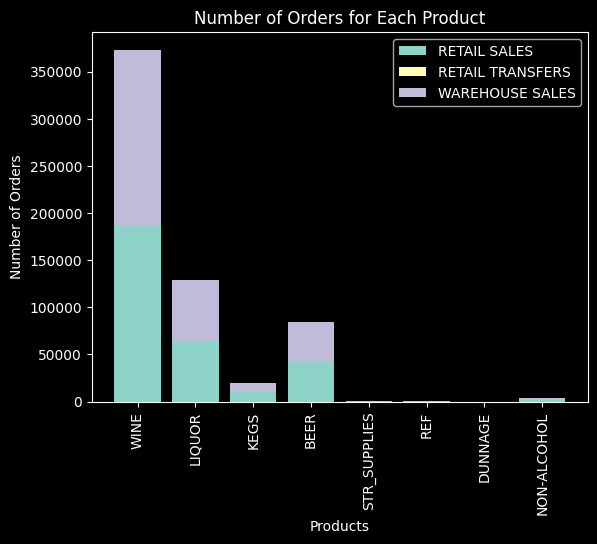

In [132]:

plt.style.use('dark_background')
plt.bar(prods, retail_orders)
plt.bar(prods, retail_trans_orders, bottom= retail_orders)
plt.bar(prods, ware_orders, bottom= retail_trans_orders)
plt.xticks(rotation= 90)
plt.legend(['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'])
plt.xlabel('Products')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Product')
plt.show()

In [133]:
grp01 = df.groupby('ITEM TYPE')
grp01['ITEM TYPE'].unique()

ITEM TYPE
BEER                    [BEER]
KEGS                    [KEGS]
LIQUOR                [LIQUOR]
NON-ALCOHOL      [NON-ALCOHOL]
REF                      [REF]
STR_SUPPLIES    [STR_SUPPLIES]
WINE                    [WINE]
Name: ITEM TYPE, dtype: object

In [134]:
prods

array(['WINE', 'LIQUOR', 'KEGS', 'BEER', 'STR_SUPPLIES', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

In [135]:
grp = df.groupby('ITEM TYPE').agg({
    'RETAIL SALES' : 'sum',
    'RETAIL TRANSFERS' : 'sum',
    'WAREHOUSE SALES' : 'sum'
})

In [136]:
grp['TOTAL SALES'] = grp['RETAIL SALES'] + grp['RETAIL TRANSFERS'] + grp['WAREHOUSE SALES']

In [137]:
grp.head(20)

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
ITEM TYPE,,,,
BEER,573920.19,566803.37,6524313.99,7665037.55
KEGS,0.00,0.00,118621.00,118621.00
LIQUOR,801684.24,794787.57,94968.19,1691440.00
NON-ALCOHOL,34055.54,26664.34,26157.26,86877.14
REF,661.38,389.00,298.00,1348.38
STR_SUPPLIES,2740.88,10846.58,0.00,13587.46
WINE,745191.78,734643.07,1156325.69,2636160.54


In [138]:
grp_plt = []

for i in prods:
    grp_plt.append(np.squeeze(grp.query(f"`ITEM TYPE` == '{i}'")['TOTAL SALES']))

grp_plt[6] = 0
grp_plt

[2636160.54,
 1691440.0,
 118621.0,
 7665037.550000001,
 13587.46,
 1348.38,
 0,
 86877.14]

In [139]:
np.squeeze(grp.query(f"`ITEM TYPE` == 'WINE'")['TOTAL SALES'])

2636160.54

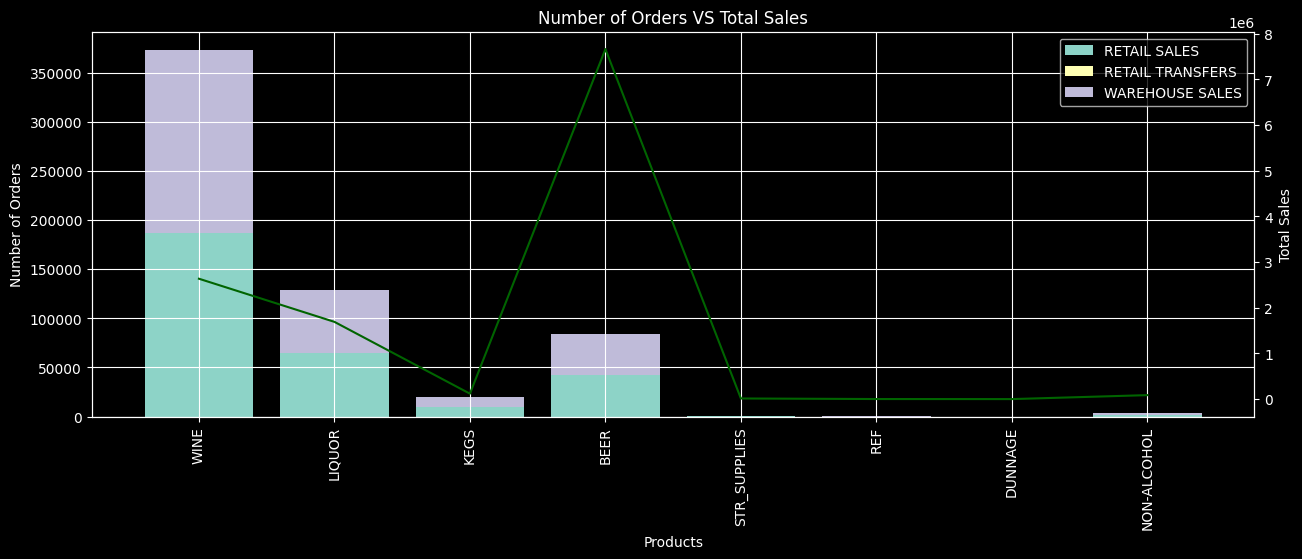

In [140]:
fig, ax1 = plt.subplots(figsize= (15, 5))
plt.style.use('dark_background')

ax1.bar(prods, retail_orders)
ax1.bar(prods, retail_trans_orders, bottom= retail_orders)
ax1.bar(prods, ware_orders, bottom= retail_trans_orders)
plt.xticks(rotation= 90)

ax2 = ax1.twinx()
ax2.plot(prods, grp_plt, color= 'darkgreen')

ax1.legend(['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'])
ax1.grid()
ax1.set_xlabel('Products')
ax1.set_ylabel('Number of Orders')
ax2.set_ylabel('Total Sales')

plt.title('Number of Orders VS Total Sales')
plt.show()

In [141]:
# Despite having low number of orders for beer, we can see very high sales from it which leaves us with two possibilities:
# Either the order of the beer has very large quantity of it,
# Or Beer itself is quiet expensive  
# So, let's investigate these two possobilities

In [142]:
df.query("`ITEM TYPE` == 'WINE'").head(50) 

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
36267,2017,6,CONSTANTINE WINES INC,100008,AMITY VINEYARDS P/NOIR 2013 - 750ML,WINE,0.00,0.0,0.0
36268,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.00,0.0,6.0
36269,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,0.00,0.0,1.0
36270,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
36271,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.08,0.0,0.0
36272,2017,6,DIONYSOS IMPORTS INC,100285,NAOUSSA RED WINE - 750ML,WINE,0.00,0.0,1.0
36273,2017,6,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.56,0.0,10.0
36274,2017,6,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,0.40,2.0,17.0
36275,2017,6,REPUBLIC NATIONAL DISTRIBUTING CO,100714,MONTEVINA WH ZIN - 750ML,WINE,0.00,0.0,1.0
36276,2017,6,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,1.08,0.0,0.0


In [143]:
df.query("`ITEM TYPE` == 'BEER'").head(50)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
36296,2017,6,HEINEKEN USA,7803,HEINEKEN 4/6NR - 7OZ,BEER,87.25,97.0,221.75
36299,2017,6,ANHEUSER BUSCH INC,8788,BUD 2/12 LNNR - 12OZ,BEER,1.50,0.0,1128.00
36300,2017,6,DOPS INC,96814,MCEWANS SCOTCH ALE 4/6NR - 12OZ,BEER,0.00,0.0,1.00
36316,2017,6,DOPS INC,10248,ALPINE DUET 4/6 - 120Z,BEER,0.00,0.0,2.00
36317,2017,6,KATCEF BROTHERS INC,10254,VICTORY HOP RANCH - 6/4NR 12.0Z,BEER,0.34,0.0,0.00
36325,2017,6,ALLAGASH BREWING COMPANY,10271,ALLAGASH SAISON 6/4 NR 12.0Z,BEER,5.58,7.0,14.00
36334,2017,6,LEGENDS LTD,10285,OMMEGANG SOOTHSAYER - 750ML,BEER,0.08,0.0,0.00
36336,2017,6,NORTH LOCK LLC DBA PORT CITY BREWING CO,10299,PORT CITY COLOSSAL V - 6/4 NR,BEER,0.17,0.0,0.00
36337,2017,6,KATCEF BROTHERS INC,10302,VICTORY BLACK BOARD SERIES - 4/6NR,BEER,0.50,0.0,0.00
36339,2017,6,KATCEF BROTHERS INC,10306,TROEGS SOLID SENDER PALE ALE - 4/6NR,BEER,1.00,1.0,1.00


In [144]:
#From the previous two table we can see that the sales for beer are quiet large despite being less in the number of orders than Wine
# Also, these tables are not giving you the number of units being sold for each order, so, it's hard to tell whether beer is more
# expensive than wine or not  

In [145]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
36267,2017,6,CONSTANTINE WINES INC,100008,AMITY VINEYARDS P/NOIR 2013 - 750ML,WINE,0.00,0.0,0.0
36268,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.00,0.0,6.0
36269,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,0.00,0.0,1.0
36270,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
36271,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.08,0.0,0.0


In [146]:
df['SUPPLIER'].nunique()

395

In [147]:
# Since there is a huge number of suppliers, we will just analyze the top ones
df['TOTAL'] = df['RETAIL SALES'] + df['RETAIL TRANSFERS'] + df['WAREHOUSE SALES']

In [148]:
# df.query(f"`SUPPLIER` == '{supp[0]}'")['TOTAL'].sum()
x = []
x.append(df.query(f"`SUPPLIER` == '{supp[0]}'")['TOTAL'].sum())
x

[31075.67]

In [149]:
supp = df['SUPPLIER'].unique()
supp_sales = []

for i in supp:
    supp_sales.append(df[df['SUPPLIER'] == i]['TOTAL'].sum())
    

In [150]:
supplier_sales = dict(zip(supp, supp_sales))
supplier_sales = dict(sorted(supplier_sales.items(), key=lambda x: x[1], reverse=True))

In [160]:
x = list(supplier_sales.keys())
y = list(supplier_sales.values())

In [165]:
len(y)

396

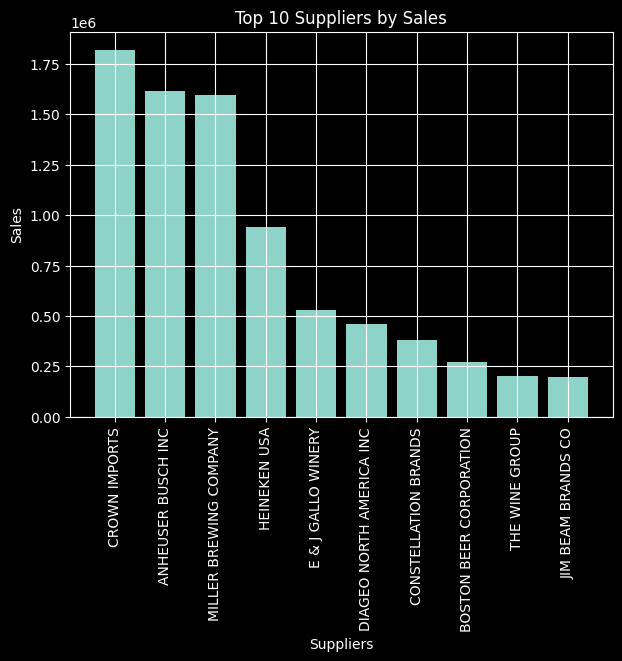

In [168]:
plt.figure(figsize= (7, 5))
plt.bar(x[:10], y[:10])
plt.xticks(rotation= 90)
plt.xlabel('Suppliers')
plt.ylabel('Sales')
plt.title('Top 10 Suppliers by Sales')
plt.grid()
plt.show()

In [173]:
# let's make another plot that shows each source's contribution to the sales

df = df.sort_values(['TOTAL'], ascending= False)
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL
13281,2020,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1174.0,1041.0,18317.00,20532.00
235839,2019,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1198.0,1416.0,17810.87,20424.87
210692,2019,5,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1373.0,1207.0,17703.62,20283.62
105572,2017,11,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,992.0,981.0,16079.12,18052.12
223540,2019,6,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1494.0,1462.0,14739.92,17695.92


In [190]:
df_supp = df.groupby('SUPPLIER')[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL']].sum().sort_values(by='TOTAL', ascending=False)
df_supp.head(10)

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL
SUPPLIER,,,,
CROWN IMPORTS,84437.66,82832.76,1651871.51,1819141.93
ANHEUSER BUSCH INC,109887.22,108273.56,1397843.85,1616004.63
MILLER BREWING COMPANY,87101.94,85226.79,1425202.71,1597531.44
HEINEKEN USA,56120.28,54864.42,828816.46,939801.16
E & J GALLO WINERY,165978.90,165029.61,197381.78,528390.29
DIAGEO NORTH AMERICA INC,145249.59,144010.32,170564.13,459824.04
CONSTELLATION BRANDS,131558.81,129769.51,119260.51,380588.83
BOSTON BEER CORPORATION,40107.63,40107.21,191532.39,271747.23
THE WINE GROUP,64162.90,63860.39,72185.57,200208.86


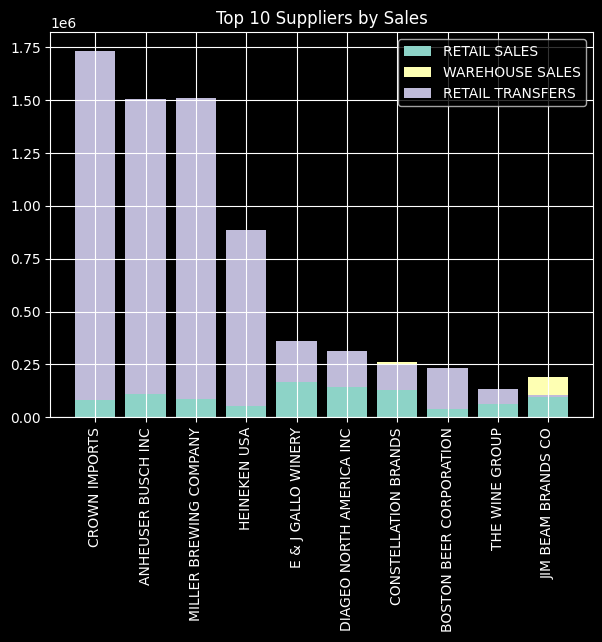

In [205]:
num = 10
x = df_supp.index[:num]
y_1 =  df_supp['RETAIL SALES'][:num]
y_2 = df_supp['RETAIL TRANSFERS'][:num]
y_3 = df_supp['WAREHOUSE SALES'][:num]

plt.figure(figsize= (7, 5))
plt.bar(x, y_1)
plt.bar(x, y_2, bottom= y_1)
plt.bar(x, y_3, bottom= y_2)
plt.legend(['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS'])
plt.title('Top 10 Suppliers by Sales')
plt.xticks(rotation= 90)
plt.grid()
plt.show()